 ## 8. Orientation

In [21]:
from geometry.lines import line_side
from geometry.plane import plane_plot

from sympy import (
    cos,
    Eq,
    Line,
    pi,
    Point,
    Ray,
    Segment,
    sin
)

In [4]:
class Angle:
    """ Create an angle. """

    def __init__(self, x: Point, y: Point, z: Point):
        """
        x: A Point.
        y: A Point.
        z: A Point.
        """
        self.x = x
        self.y = y
        self.z = z
        self.r = Segment(self.y, self.x)
        self.s = Segment(self.y, self.z)
        self.is_Point = False
        self.points = [self.x, self.y, self.z]

    def __repr__(self):
        return 'Angle(' + str(self.r) + ', ' + str(self.s) + ')'

    def __str__(self):
        return self.__repr__

    def angle(self):
        return self.r.angle_between(self.s)

    def is_congruent(self, other):
        """ Checks whether an angle is congruent with another. """
        checks = [
            self.r.length == other.r.length,
            self.s.length == other.s.length,
            line_side(Line(self.x, self.y), self.z) ==\
                line_side(Line(other.x, other.y), other.z)
        ]
        return all(checks)
        

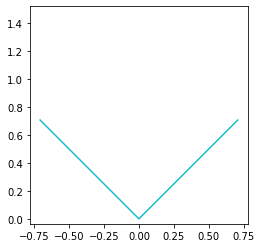

In [5]:
OO = Point(0, 0)
A1 = Point(cos(pi/4), sin(pi/4))
B1 = Point(cos((pi/4)*3), sin((pi/4)*3))

A1OOB1 = Angle(A1, OO, B1)
plane_plot(A1OOB1)

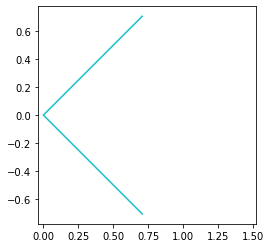

In [6]:
A2 = Point(cos((pi/4)*7), sin((pi/4)*7))
B2 = A1

A2OOB2 = Angle(A2, OO, B2)
plane_plot(A2OOB2)

In [7]:
A1OOB1.is_congruent(A2OOB2)

True

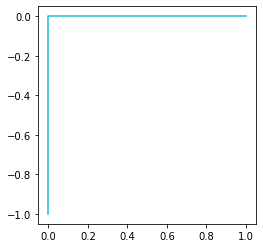

In [8]:
A3 = Point(1, 0)
B3 = Point(0, -1)

A3OOB3 = Angle(A3, OO, B3)
plane_plot(A3OOB3)

In [9]:
A1OOB1.is_congruent(A3OOB3)

False

In [26]:
def orientation_property_i(s: Ray, r: Ray):
    """ Confirm -r to left of s. """
    if not (s.p1.x == r.p1.x and s.p1.y == r.p1.y):
        raise ValueError("Rays don't start from common Point.")

    s_line = Line(s.p1, s.p2)
    r_line = Line(r.p1, r.p2)
    r_minus = Line(r.p1, Point(-r.p2.x, -r.p2.y))

    return line_side(r_line, s.p2) == line_side(s_line, r_minus.p2)


s1 = Ray(OO, Point(cos(1.3), sin(1.3)))
r1 = Ray(OO, Point(cos(.3), sin(.3)))

orientation_property_i(s1, r1)

True

In [27]:
def orientation_property_ii(s: Ray, r: Ray):
    """ Confirm -s to the left of r. """
    if not (s.p1.x == r.p1.x and s.p1.y == r.p1.y):
        raise ValueError("Rays don't start from common Point.")

    s_line = Line(s.p1, s.p2)
    r_line = Line(r.p1, r.p2)
    s_minus = Line(s.p1, Point(-s.p2.x, -s.p2.y))

    return line_side(r_line, s.p2) != line_side(r_line, s_minus.p2)


orientation_property_ii(s1, r1)

True

In [39]:
def orientation_property_iii(s1: Ray, r1: Ray, s2: Ray, r2: Ray):
    """ Confirm translation. """
    if not (s1.p1.x == r1.p1.x and s1.p1.y == r1.p1.y):
        raise ValueError("Rays 1 don't start from common Point.")

    if not (s2.p1.x == r2.p1.x and s2.p1.y == r2.p1.y):
        raise ValueError("Rays 2 don't start from common Point.")

    checks = [
        r1.length == r2.length,
        s1.length == s2.length,
        s1.angle_between(r1).evalf() == s2.angle_between(r2).evalf()
    ]
    return all(checks)


s2 = Ray(OO, Point(cos(1.5), sin(1.5)))
r2 = Ray(OO, Point(cos(.5), sin(.5)))

orientation_property_iii(s1, r1, s2, r2)

True

In [40]:
s3 = Ray(OO, Point(cos(1.5), sin(1.5)))
r3 = Ray(OO, Point(cos(.6), sin(.6)))

orientation_property_iii(s1, r1, s3, r3)

False